**Notebook Model K-Nearest Neighbors (KNN)**

Notebook ini berisi langkah-langkah pembuatan model K-Nearest Neighbors (KNN) untuk melakukan deteksi dini terhadap karies gigi menggunakan sensor AS7262. Data yang digunakan merupakan intensitas cahaya emisi dari campuran sampel saliva pasien dengan larutan kurkumin yang disinari dengan sumber eksitasi LED UV. 

Data pada penelitian ini terdiri dari enam channel panjang gelombang sensor AS7262 dengan panjang gelombang  450, 500, 550, 570, 600 dan 650 nm serta jenis klasifikasinya (sehat dan karies).

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
              precision    recall  f1-score   support

      karies       0.86      0.67      0.75         9
       sehat       0.70      0.88      0.78         8

    accuracy                           0.76        17
   macro avg       0.78      0.77      0.76        17
weighted avg       0.78      0.76      0.76        17



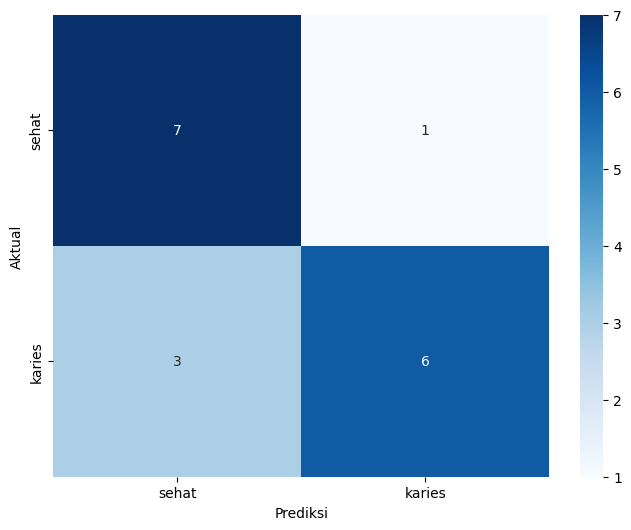

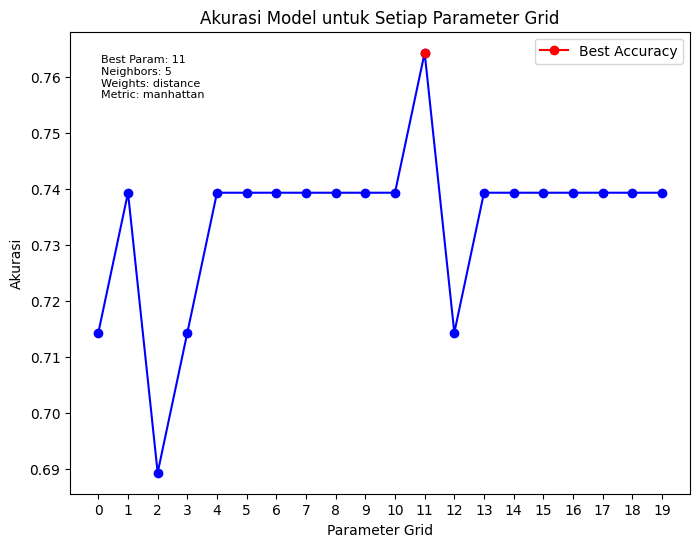

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Membaca data dari file CSV
df = pd.read_csv(r'D:\Mine\Kuliah\Tugas_Akhir\Program\Fix\5_Tetes\5tetes_normalisasi_oversampled.csv')
# Memisahkan fitur (X) dan label (y)
X = df[['Ungu', 'Biru', 'Hijau', 'Kuning', 'Oranye', 'Merah']].values
y = df['label'].values
# Mengatur urutan kelas sesuai keinginan
label_order = ['sehat', 'karies']
# Mengubah label menjadi nilai numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31, stratify=y)
# Membuat objek klasifikasi k-NN
knn_model = KNeighborsClassifier()
# Membuat parameter grid untuk dicari
param_grid = {
    'n_neighbors': [5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)
# Melakukan grid search untuk mencari parameter terbaik
grid_search.fit(X_train, y_train)
# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
# Membuat model k-NN dengan parameter terbaik
best_knn_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                      weights=best_params['weights'],
                                      metric=best_params['metric'])
# Melatih model dengan parameter terbaik menggunakan data latih
best_knn_model.fit(X_train, y_train)
# Memprediksi kelas pada data uji
y_pred = best_knn_model.predict(X_test)
# Mengubah label kembali ke bentuk asli
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)
# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))
# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=label_order)
# Menampilkan Confusion Matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=label_order, yticklabels=label_order)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Menampilkan grafik akurasi untuk setiap parameter grid
results = grid_search.cv_results_
parameters = results['params']
accuracies = results['mean_test_score']
best_accuracy_index = np.argmax(accuracies)
best_params = parameters[best_accuracy_index]

plt.figure(figsize=(8, 6))
plt.plot(range(len(accuracies)), accuracies, marker='o', color='blue')
plt.plot(best_accuracy_index, accuracies[best_accuracy_index], marker='o', color='red', label='Best Accuracy')
plt.xticks(range(len(accuracies)), range(len(accuracies)))
plt.xlabel('Parameter Grid')
plt.ylabel('Akurasi')
plt.title('Akurasi Model untuk Setiap Parameter Grid')
plt.legend()

# Menambahkan teks untuk nomor kombinasi dan parameter terbaik
best_param_label = f'Best Param: {best_accuracy_index}\nNeighbors: {best_params["n_neighbors"]}\nWeights: {best_params["weights"]}\nMetric: {best_params["metric"]}'
plt.text(0.05, 0.95, best_param_label, transform=plt.gca().transAxes, fontsize=8, va='top')

plt.show()





Bagian ini digunakan untuk menguji model dengan data baru yang tidak ada hubungannya dengan proses pelatihan.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Membaca data dari file CSV
df = pd.read_csv(r'D:\Mine\Kuliah\Tugas_Akhir\Program\Fix\5_Tetes\5tetes_normalisasi_oversampled.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['Ungu', 'Biru', 'Hijau', 'Kuning', 'Oranye', 'Merah']].values
y = df['label'].values

# Mengatur urutan kelas sesuai keinginan
label_order = ['sehat', 'karies']

# Mengubah label menjadi nilai numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membuat objek klasifikasi k-NN
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Melatih model menggunakan seluruh data
knn_model.fit(X_scaled, y)

# Menerima input dari pengguna untuk fitur-fitur dipisahkan koma
features = input("Masukkan nilai untuk setiap fitur dipisahkan koma: ")
feature_values = features.split(",")

# Memastikan jumlah fitur yang dimasukkan sesuai dengan yang diharapkan
if len(feature_values) != 6:
    print("Jumlah fitur yang dimasukkan tidak sesuai!")
    exit()

# Mengubah nilai fitur menjadi float dan memasukkannya ke dalam array
input_data = [[float(value) for value in feature_values]]

# Normalisasi data input menggunakan MinMaxScaler
input_data_scaled = scaler.transform(input_data)

# Melakukan prediksi menggunakan model
prediction = knn_model.predict(input_data_scaled)

# Mengubah label prediksi menjadi bentuk asli
predicted_class = label_encoder.inverse_transform(prediction)

print("Hasil Prediksi:", predicted_class)
